# PyNEST - Hello World!

**Modeling networks of spiking neurons using NEST**

**OCNC summer school 2018, 28.6.2018**

**Espen Hagen - espen.hagen@fys.uio.no**

PyNEST example to be shown interactively = typing every line one after the other into a new notebook, examining what is stored in variables, looking at the status of devices, etc.

We create one neuron that receives input from a spike generator while its membrane voltage is measured.

In [1]:
# populate namespace with pylab (numpy+scipy+matplotlib) functions and inline plotting
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import nest # import NEST module

In [ ]:
# available functions in NEST's namespace
# we will use Create, Connect, GetStatus...
dir(nest)

In [ ]:
# information about functions with Python's help() ...
help(nest.Models)

In [ ]:
# ... or IPython's question mark
nest.Models?

In [ ]:
# list neuron models
nest.Models()

In [ ]:
# choose LIF neuron with exponential synaptic currents: 'iaf_psc_exp'
nest.help('iaf_psc_exp')

In [3]:
# before creating a new network,
# reset the simulation kernel / remove all nodes
nest.ResetKernel()

In [4]:
# create the neuron
neuron = nest.Create('iaf_psc_exp')

In [ ]:
# investigate the neuron

# Create() just returns a list (tuple) with handles to the new nodes
# (handles = integer numbers called ids)
neuron

In [ ]:
# current dynamical state/parameters of the neuron
# note that the membrane voltage is at -70 mV
nest.GetStatus(neuron)

In [5]:
# create a spike generator
spikegenerator = nest.Create('spike_generator')

In [ ]:
# check out 'spike_times' in its parameters
nest.GetStatus(spikegenerator)

In [6]:
# set the spike times at 10 and 50 ms
nest.SetStatus(spikegenerator, {'spike_times': [10., 50.]})

In [ ]:
# another possibility would have been (do not execute):
#nest.Create('spike_generator', params={'spike_times': [10., 50.]})

# if you want to create more than one node,
# put the number after the model type
#nest.Create('spike_generator', n=3, params={'spike_times': [10., 50.]})

In [7]:
# create a voltmeter for recording
voltmeter = nest.Create('voltmeter')

In [ ]:
# investigate the voltmeter
voltmeter

In [ ]:
# see that it records membrane voltage, senders, times
nest.GetStatus(voltmeter)

In [ ]:
# investigate Connect() function
nest.Connect?

In [8]:
# connect spike generator and voltmeter to the neuron
nest.Connect(spikegenerator, neuron, syn_spec=dict(weight=1E3))

In [9]:
nest.Connect(voltmeter, neuron)

In [10]:
# run simulation for 100 ms
nest.Simulate(100.)

In [ ]:
# look at nest's KernelStatus:
# network_size (root node, neuron, spike generator, voltmeter)
# num_connections
# time (simulation duration)
nest.GetKernelStatus()

In [ ]:
# note that voltmeter has recorded 99 events
nest.GetStatus(voltmeter)

In [11]:
# read out recording time and voltage from voltmeter
times = nest.GetStatus(voltmeter)[0]['events']['times']
voltages = nest.GetStatus(voltmeter)[0]['events']['V_m']

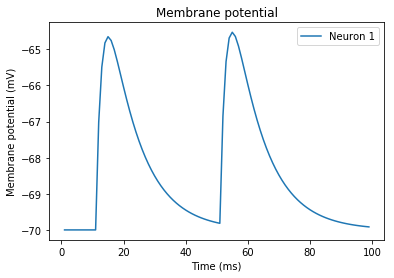

In [12]:
# plot results
# units can be found in helpdesk
pylab.plot(times, voltages, label='Neuron 1')
pylab.xlabel('Time (ms)')
pylab.ylabel('Membrane potential (mV)')
pylab.title('Membrane potential')
pylab.legend()

In [ ]:
# create the same plot with NEST's build-in plotting function
import nest.voltage_trace

In [ ]:
nest.voltage_trace.from_device(voltmeter)

**Implement a small two-population network:**

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


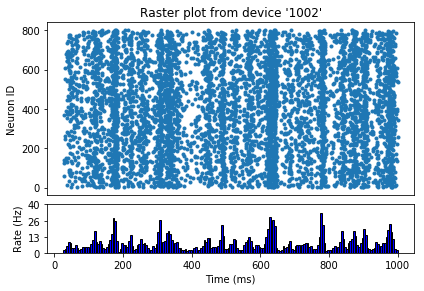

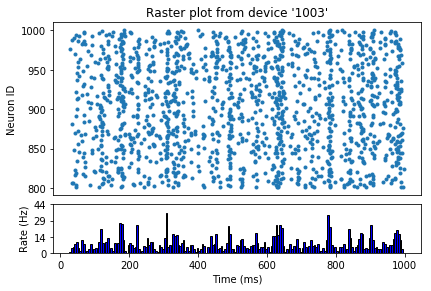

In [13]:
# define parameters
dt = 0.1         # simulation time step size
tstop = 1000.    # simulation duration
N_E = 800        # number of excitatory neurons
N_I = 200        # number of inhibitory neurons
J = 10.          # strength of excitatory connections
g = -4.          # relative strength of inhibitory connections
f_ext = 6000.    # external rate
p = 0.2          # pairwise connection probability

# reset kernel and set dt
nest.ResetKernel()
nest.SetKernelStatus({'resolution': dt})

# create nodes
neurons_E = nest.Create('iaf_psc_alpha', N_E)
neurons_I = nest.Create('iaf_psc_alpha', N_I)
noise = nest.Create('poisson_generator', 
                    params={'rate' : f_ext})
spikes_E = nest.Create('spike_detector')
spikes_I = nest.Create('spike_detector')

# connect
nest.Connect(neurons_E, neurons_E+neurons_I, 
             conn_spec={'rule': 'pairwise_bernoulli', 'p': p}, 
             syn_spec={'model':'static_synapse', 'weight': J})
nest.Connect(neurons_I, neurons_E+neurons_I, 
             conn_spec={'rule': 'pairwise_bernoulli', 'p': p},
             syn_spec={'model':'static_synapse', 'weight': g*J})
nest.Connect(noise, neurons_E+neurons_I, 
             conn_spec='all_to_all', 
             syn_spec={'weight': J, 'delay': dt})
nest.Connect(neurons_E, spikes_E, conn_spec='all_to_all')
nest.Connect(neurons_I, spikes_I, conn_spec='all_to_all')

# simulate
nest.Simulate(tstop)

# plot spiking activity
import nest.raster_plot
nest.raster_plot.from_device(spikes_E)
nest.raster_plot.from_device(spikes_I)